```
/Bone Fractures Detection
  ├── train/
  │   ├── images/
  │   └── labels/
  ├── valid/
  │   ├── images/
  │   └── labels/
  └── data.yaml


## Class name:

#### 0 = Comminuted
#### 1 = Greenstick
#### 2 = Healthy
#### 3 = Linear
#### 4 = Oblique Displaced
#### 5 = Oblique
#### 6 = Segmental
#### 7 = Spiral
#### 8 = Transverse Displaced
#### 9 = Transverse

## Step # 01 Install the Ultralytics Package

In [1]:
!nvidia-smi

Fri Apr 25 16:56:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install -U albumentations

In [3]:
# Install necessary libraries (only once per session)
!pip install -q ultralytics supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.0/984.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.5 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.116 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


In [5]:
import torch
torch.cuda.empty_cache()
print(torch.cuda.is_available())

True


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

##  Train YOLOv11 Model

In [13]:
!unzip -q "/content/archive.zip" -d "/content/Bone_Fractures_Detection"


In [15]:
!ls /content/Bone_Fractures_Detection/valid/images

ls: cannot access '/content/Bone_Fractures_Detection/valid/images': No such file or directory


In [16]:
!mkdir -p /content/Bone_Fractures_Detection/valid/images
!mkdir -p /content/Bone_Fractures_Detection/valid/labels

In [19]:
!yolo task=detect \
  mode=train \
  model=yolo11x.yaml \
  data="/content/Bone_Fractures_Detection/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml" \
  epochs=100 \
  imgsz=416 \
  batch=8 \
  device=0 \
  patience=20

Ultralytics 8.3.116 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.yaml, data=/content/Bone_Fractures_Detection/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml, epochs=100, time=None, patience=20, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

## Visualization of Labels

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pathlib

Visualizing 9 training images


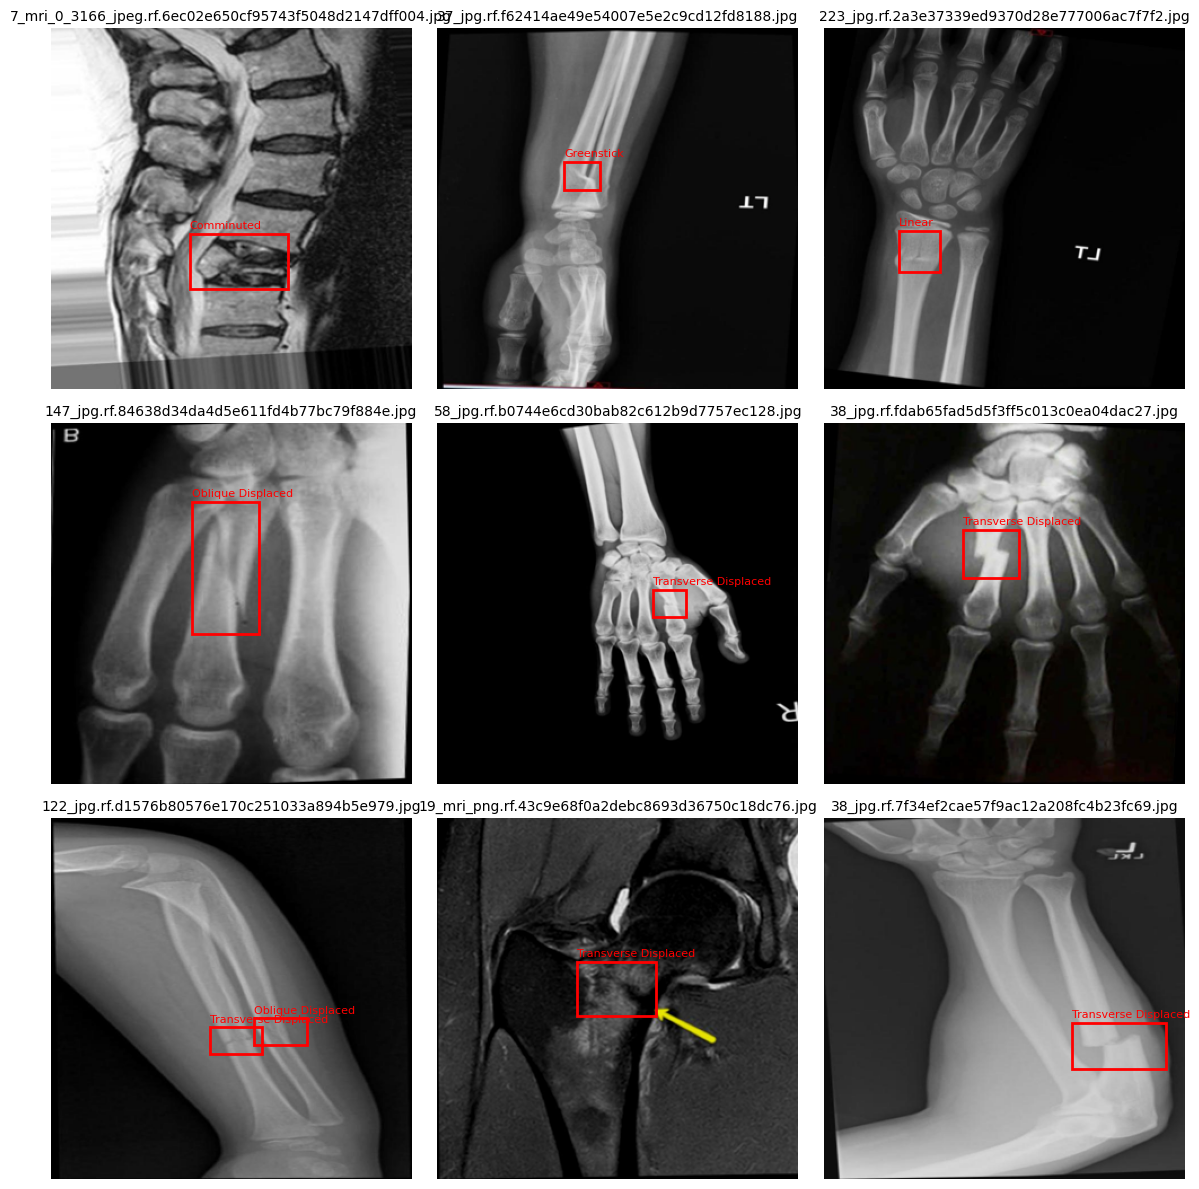

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pathlib
import math

# Path setup
train_images_dir = pathlib.Path("/content/Bone_Fractures_Detection/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/images")
train_labels_dir = pathlib.Path("/content/Bone_Fractures_Detection/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/labels")
train_images = list(train_images_dir.glob("*.jpg"))

# Limit number of images to speed up
max_images = 9
train_images = train_images[:max_images]

# Class names
class_names = ['Comminuted', 'Greenstick', 'Healthy', 'Linear', 'Oblique Displaced',
               'Oblique', 'Segmental', 'Spiral', 'Transverse Displaced', 'Transverse']

n = len(train_images)
print(f"Visualizing {n} training images")

if n == 0:
    print("⚠️ No images found in the directory. Please check the path.")
else:
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    axes = axes.flatten()

    for i in range(n):
        img = Image.open(train_images[i]).resize((320, 320))
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(train_images[i].name, fontsize=10)

        label_path = train_labels_dir / f"{train_images[i].stem}.txt"
        img_width, img_height = img.size

        if label_path.exists():
            with open(label_path, "r") as f:
                lines = f.readlines()

            for line in lines:
                values = line.strip().split()
                class_id = int(values[0])
                x_center, y_center, width, height = map(float, values[1:])
                x1 = int((x_center - width / 2) * img_width)
                y1 = int((y_center - height / 2) * img_height)
                box_width = int(width * img_width)
                box_height = int(height * img_height)

                rect = patches.Rectangle((x1, y1), box_width, box_height, linewidth=2, edgecolor="red", facecolor="none")
                axes[i].add_patch(rect)
                axes[i].text(x1, y1 - 5, class_names[class_id], color="red", fontsize=8)

    # Remove extra axes
    for j in range(n, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


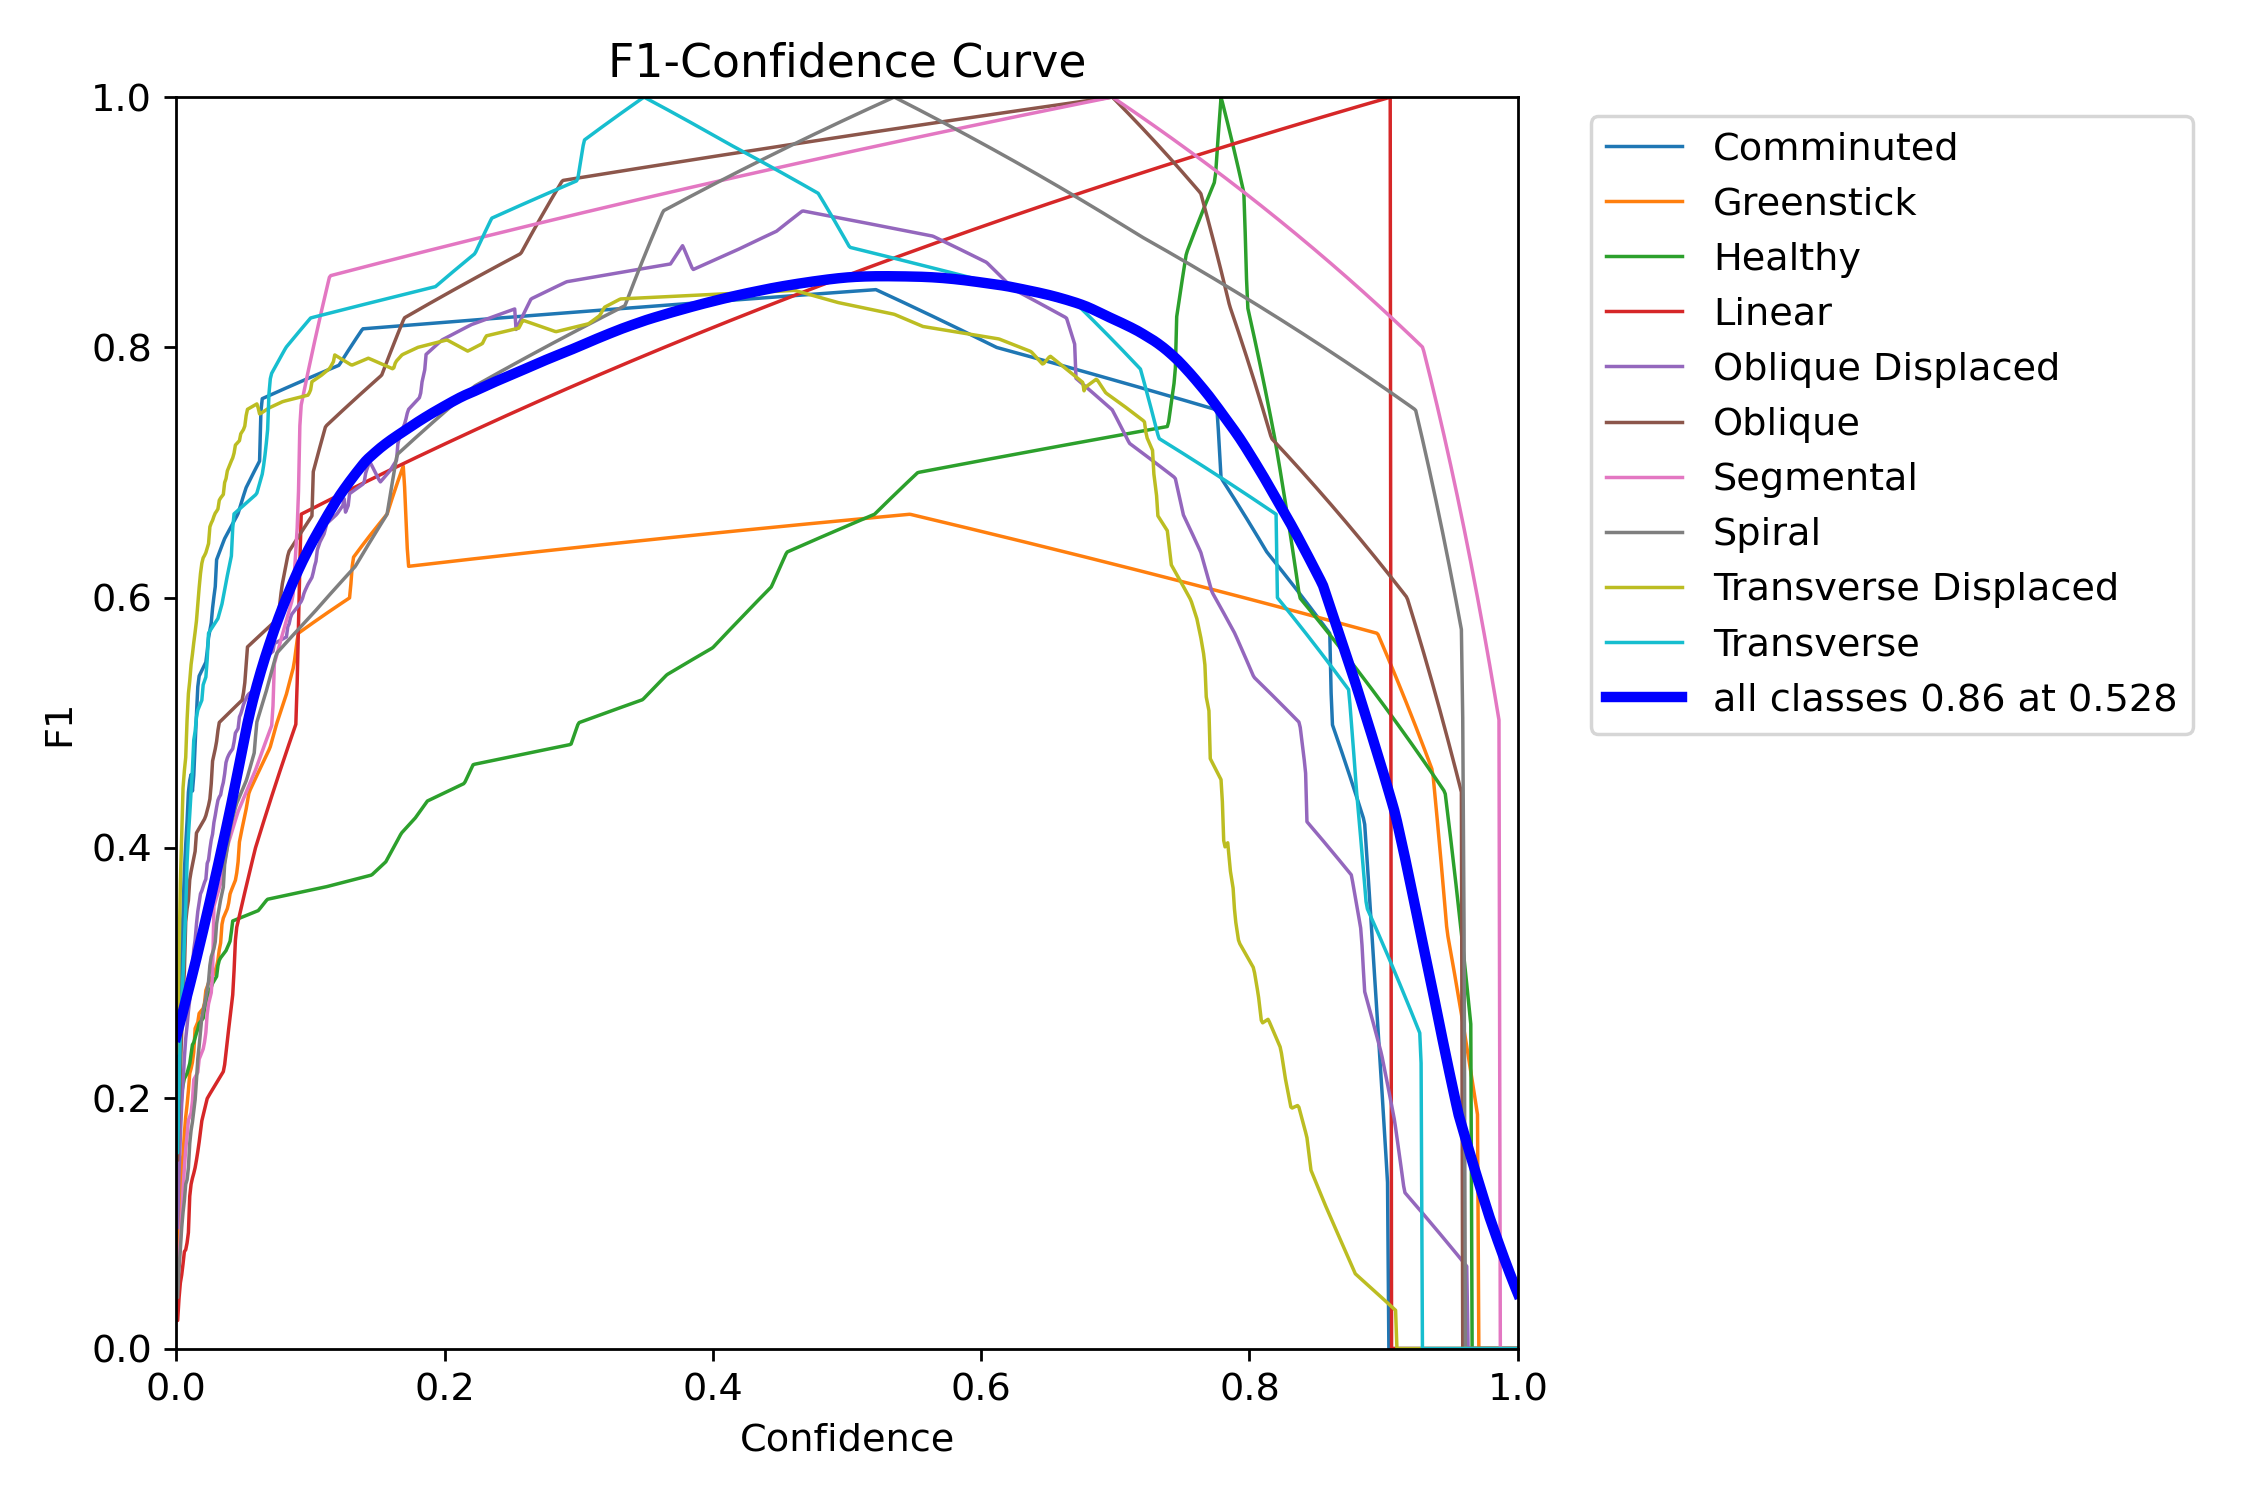

In [27]:
from IPython.display import Image, display

display(Image(filename="/content/runs/detect/train7/F1_curve.png", width=700))


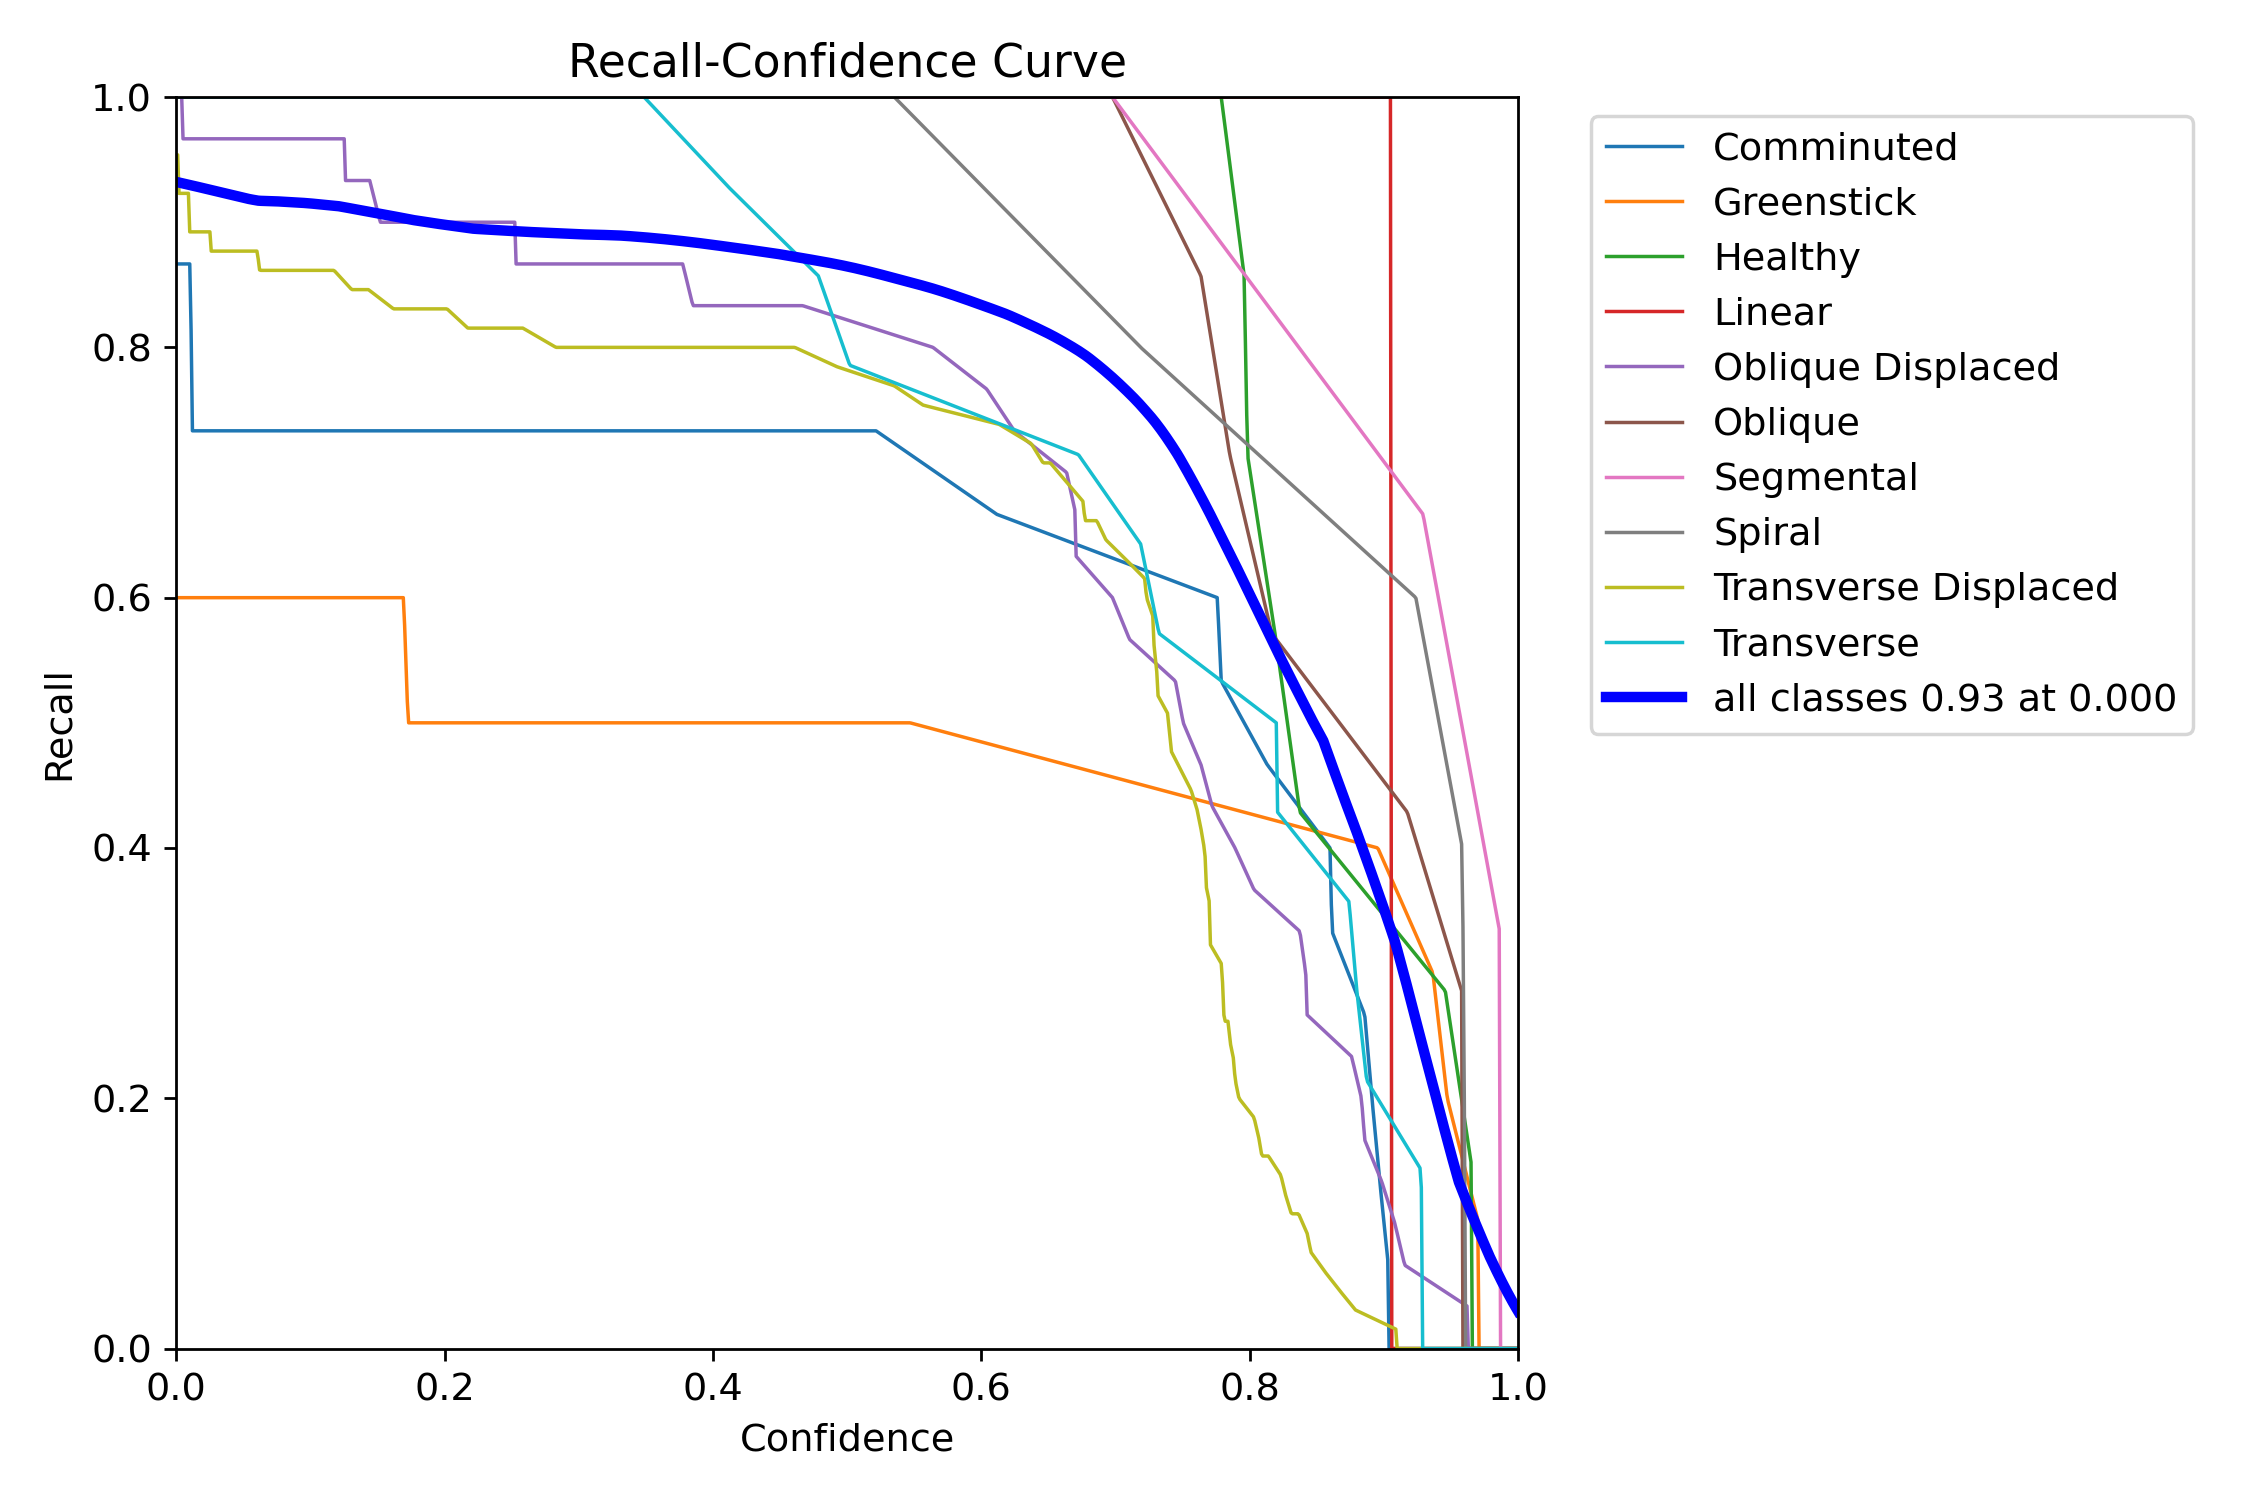

In [28]:
display(Image(filename="/content/runs/detect/train7/R_curve.png", width=700))

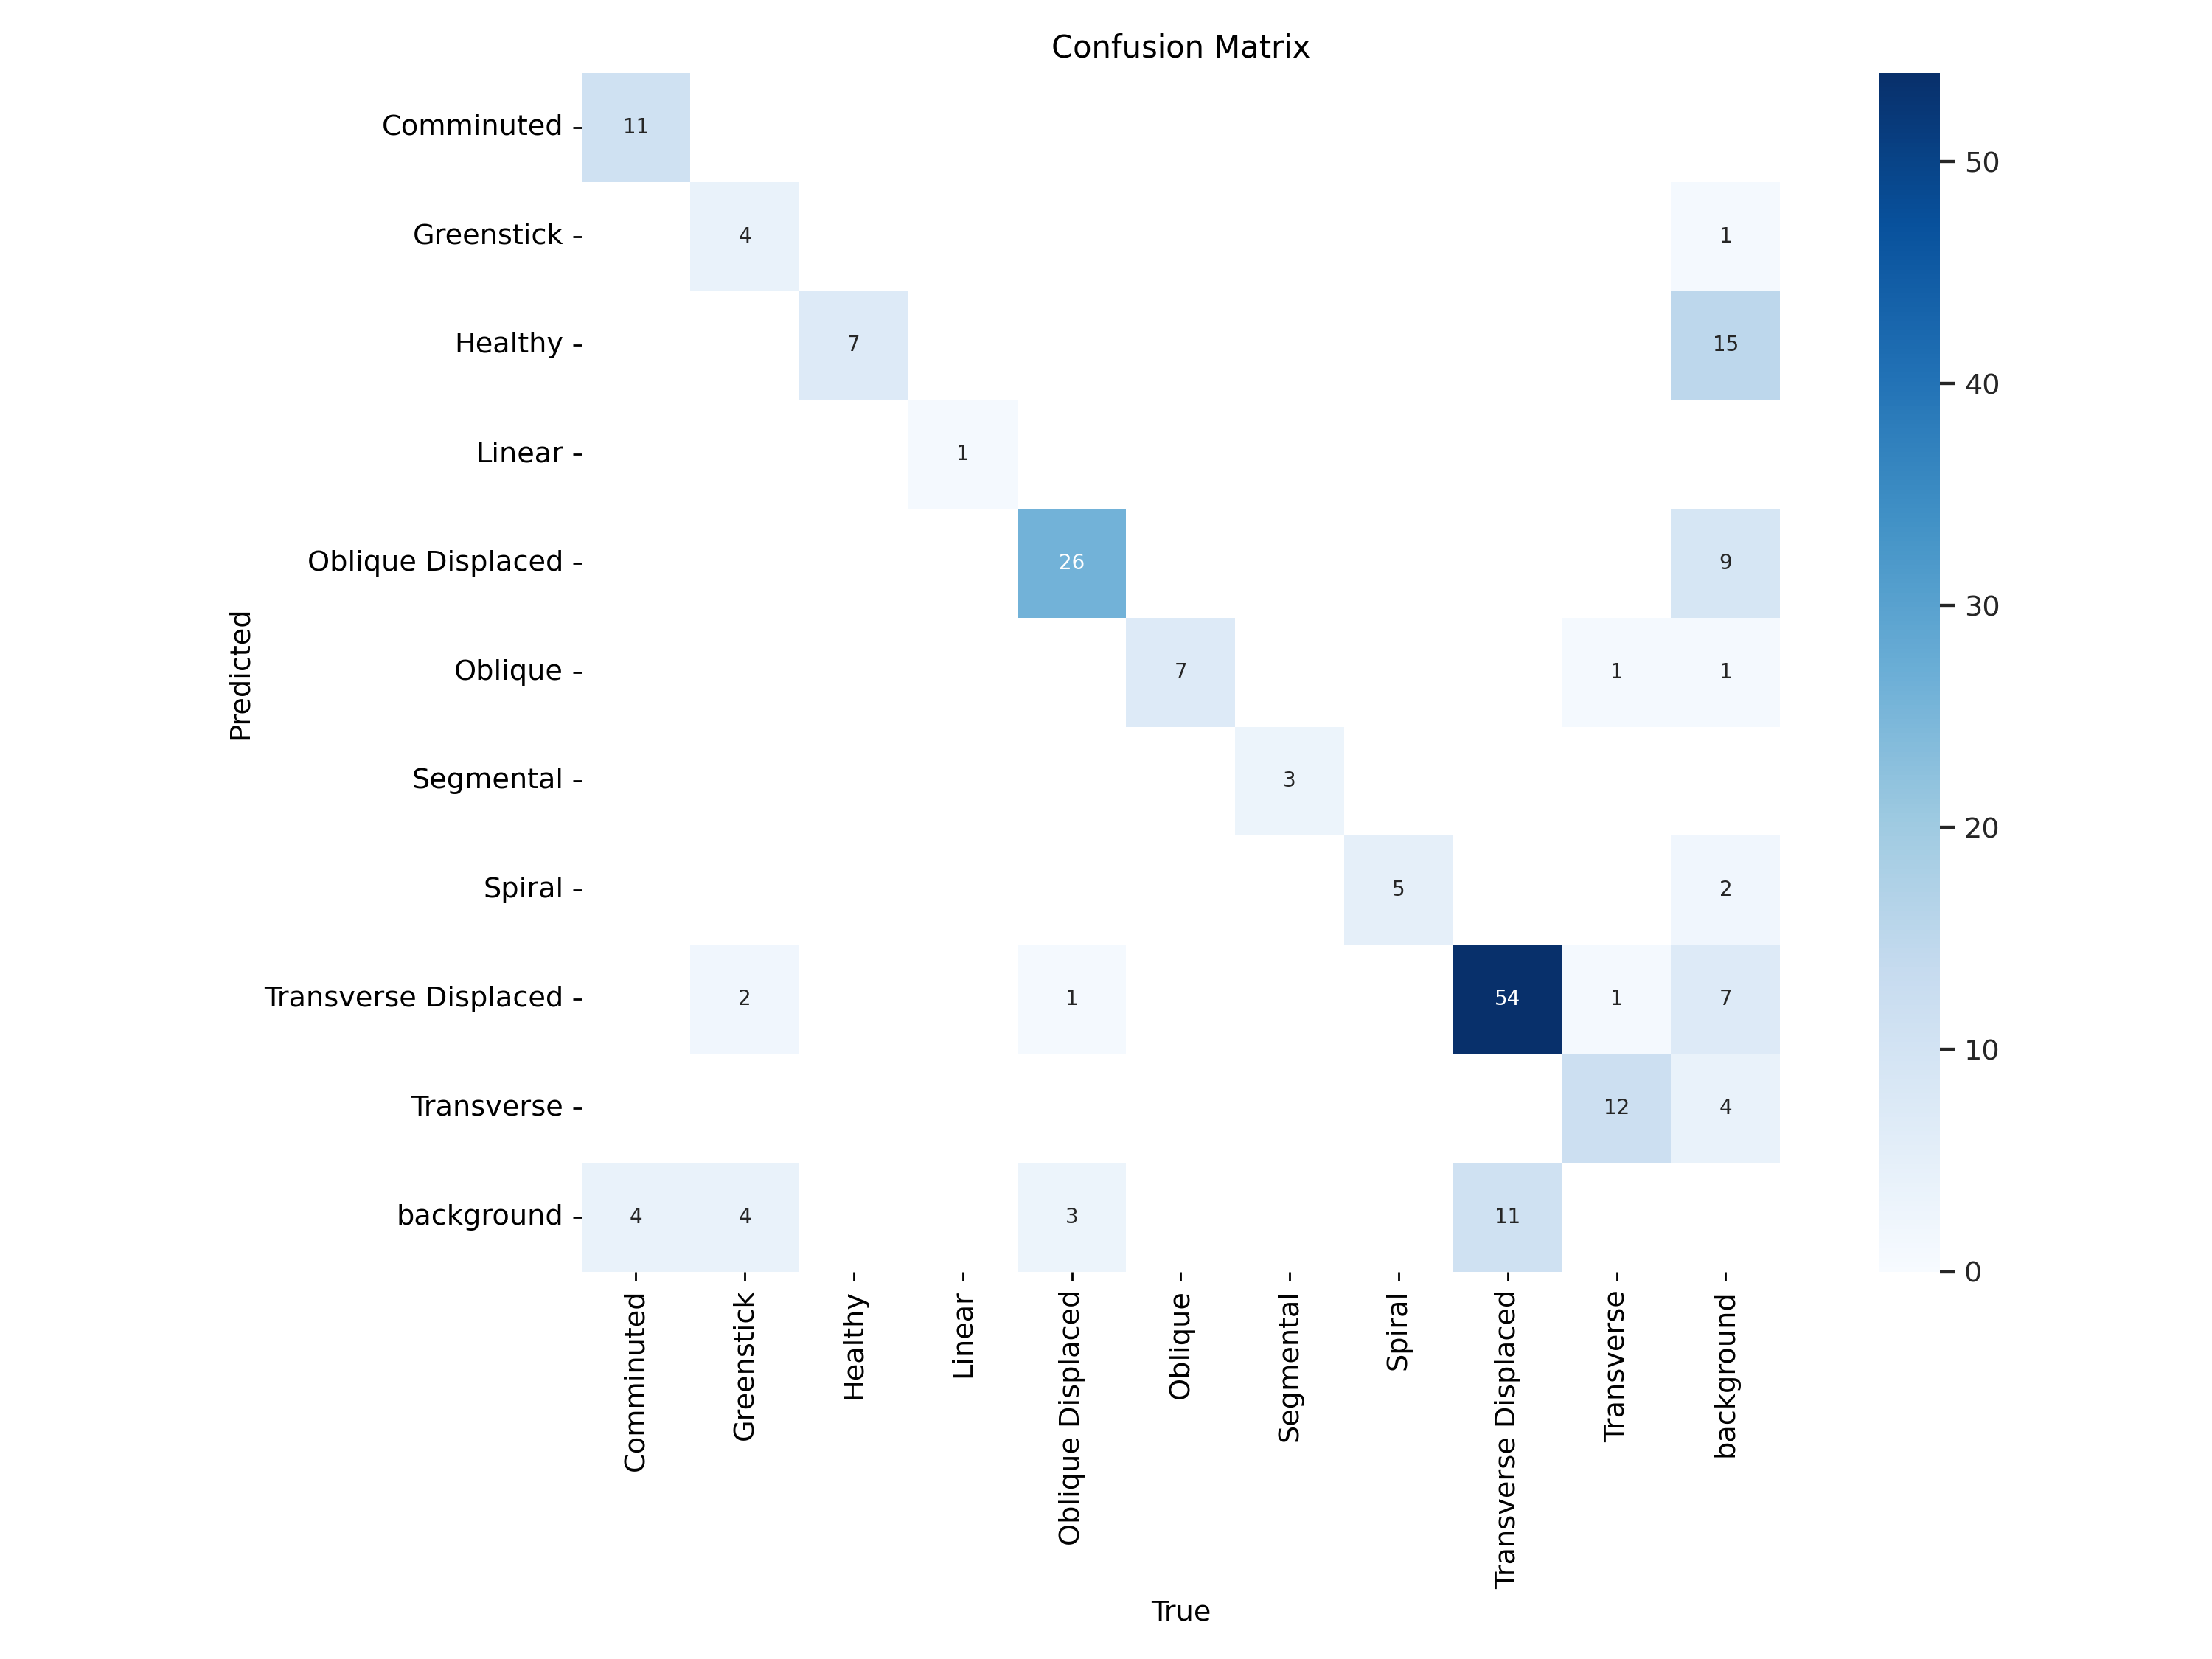

In [29]:
display(Image(filename="/content/runs/detect/train7/confusion_matrix.png", width=700))

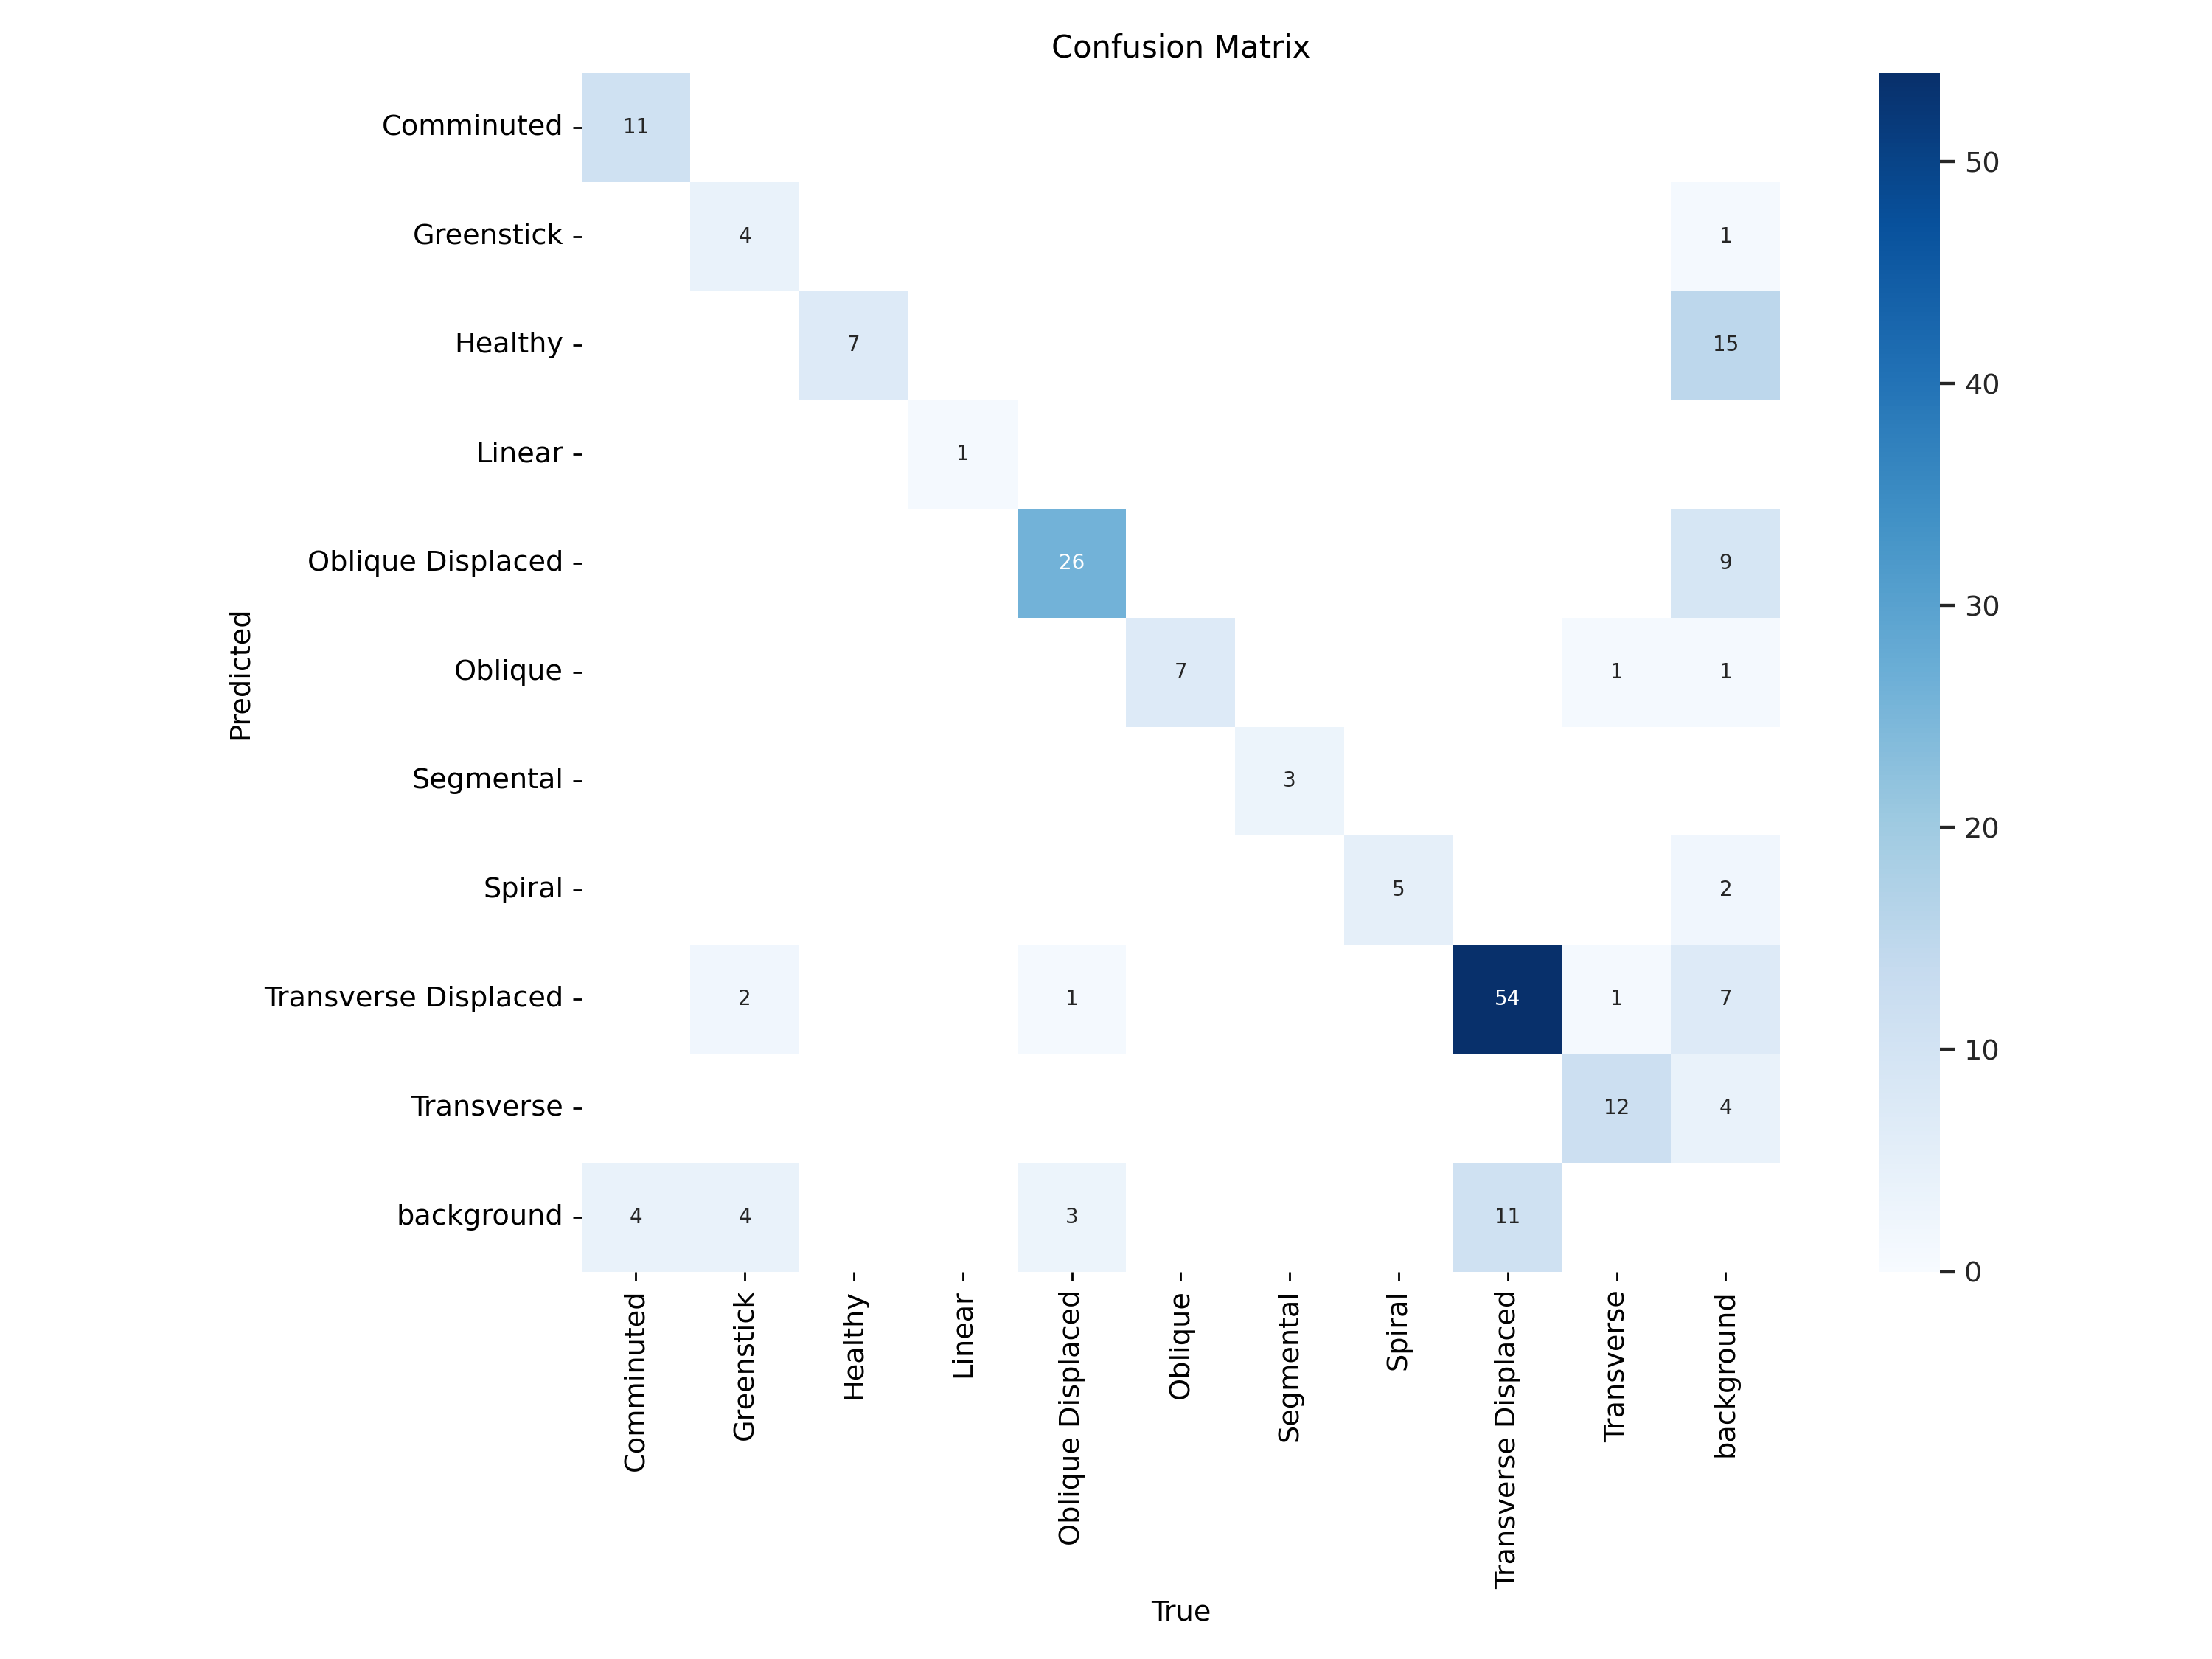

In [30]:
display(Image(filename="/content/runs/detect/train7/confusion_matrix.png", width=700))

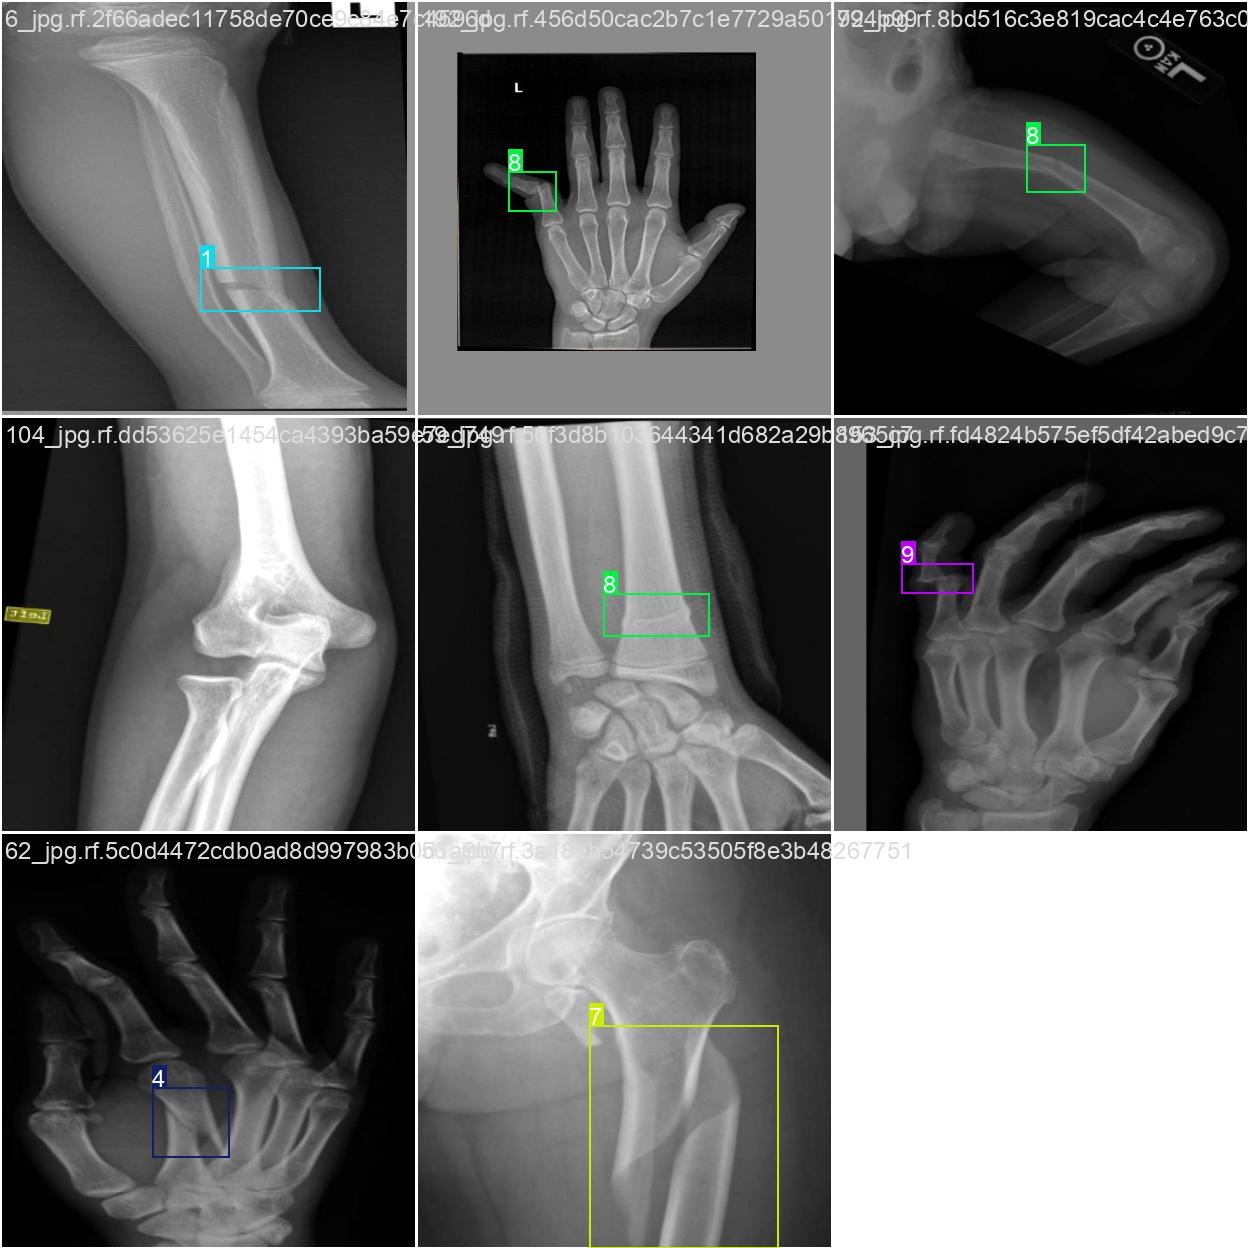

In [31]:
display(Image(filename="/content/runs/detect/train7/train_batch15210.jpg", width=700))

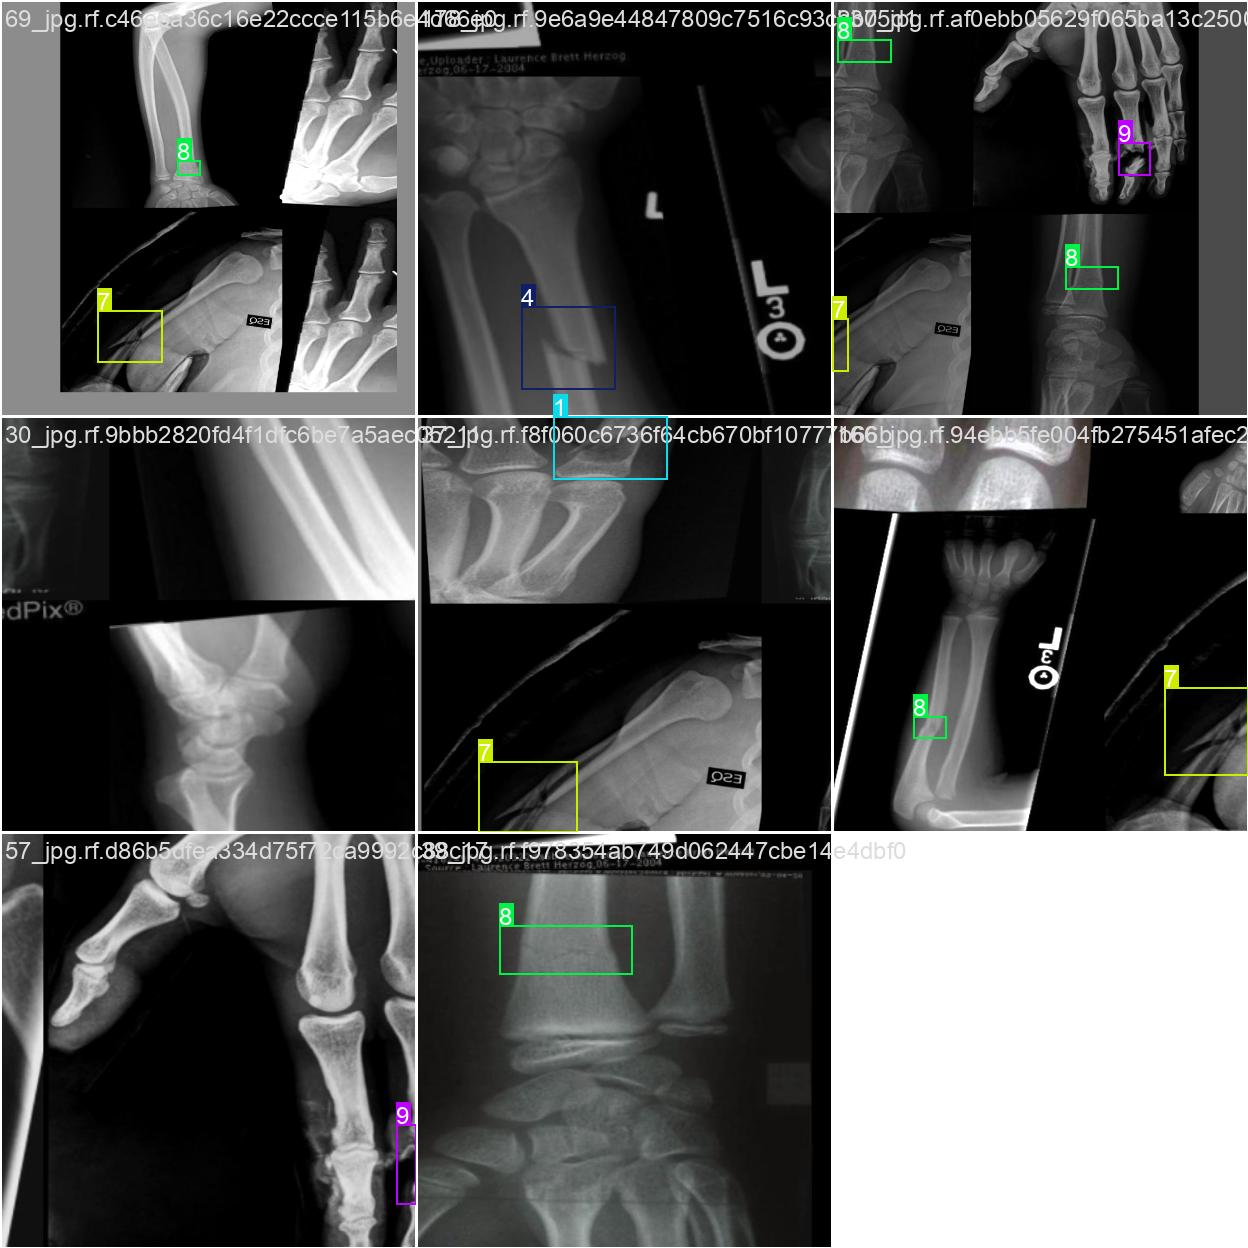

In [32]:
display(Image(filename="/content/runs/detect/train7/train_batch2.jpg", width=700))

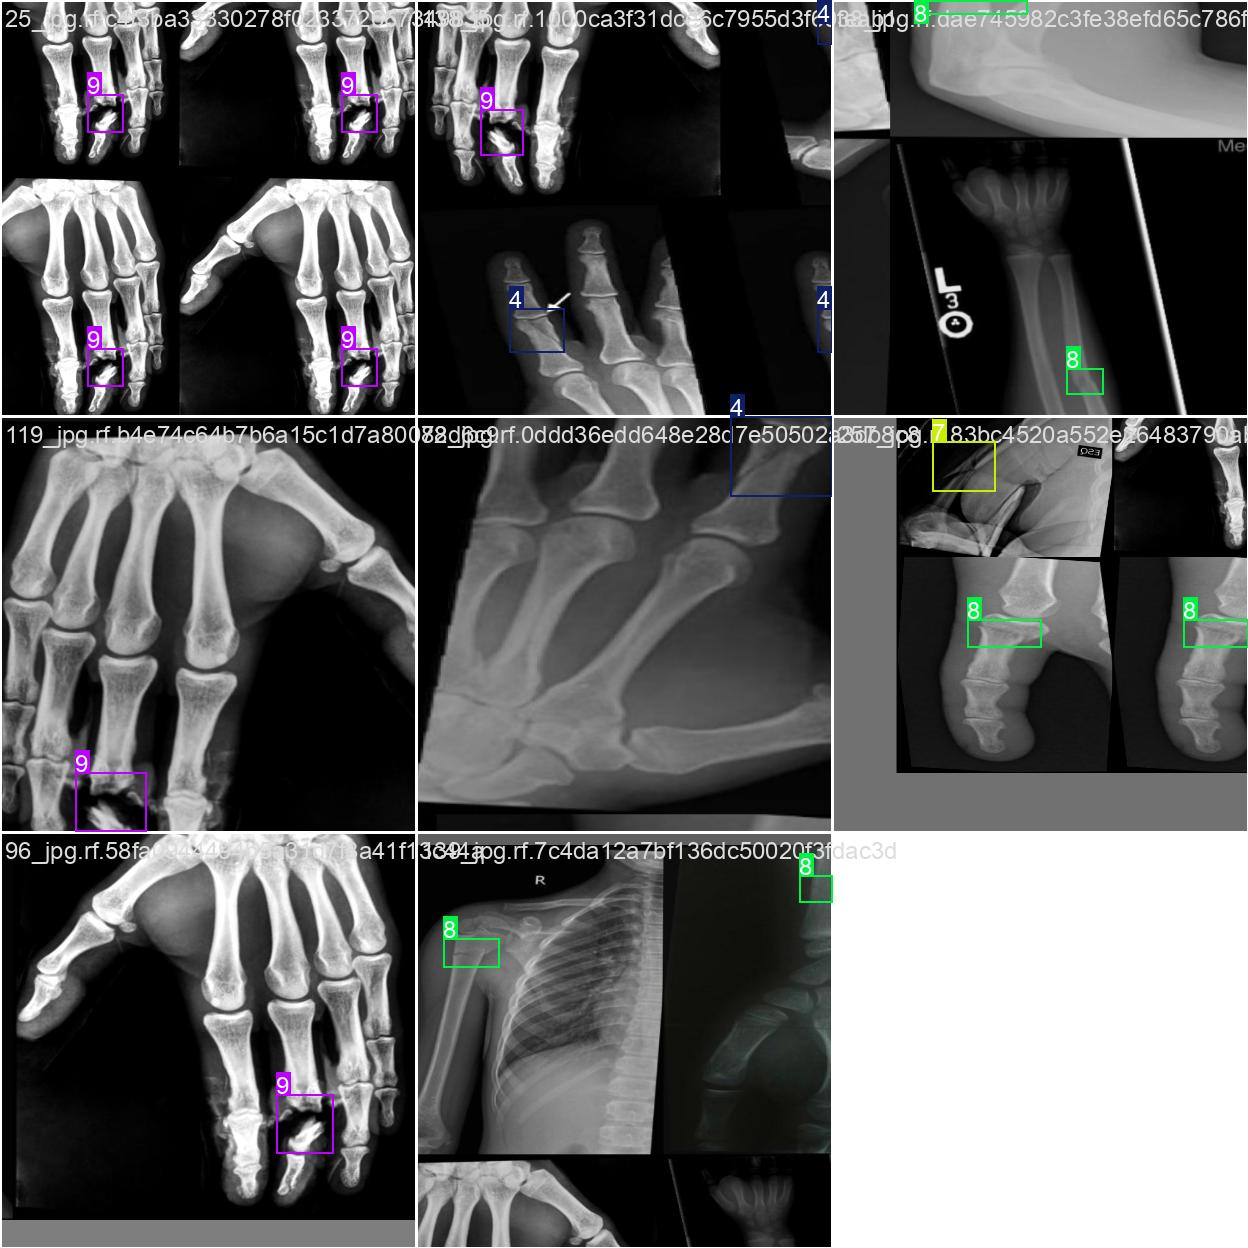

In [33]:
display(Image(filename="/content/runs/detect/train7/train_batch0.jpg", width=700))

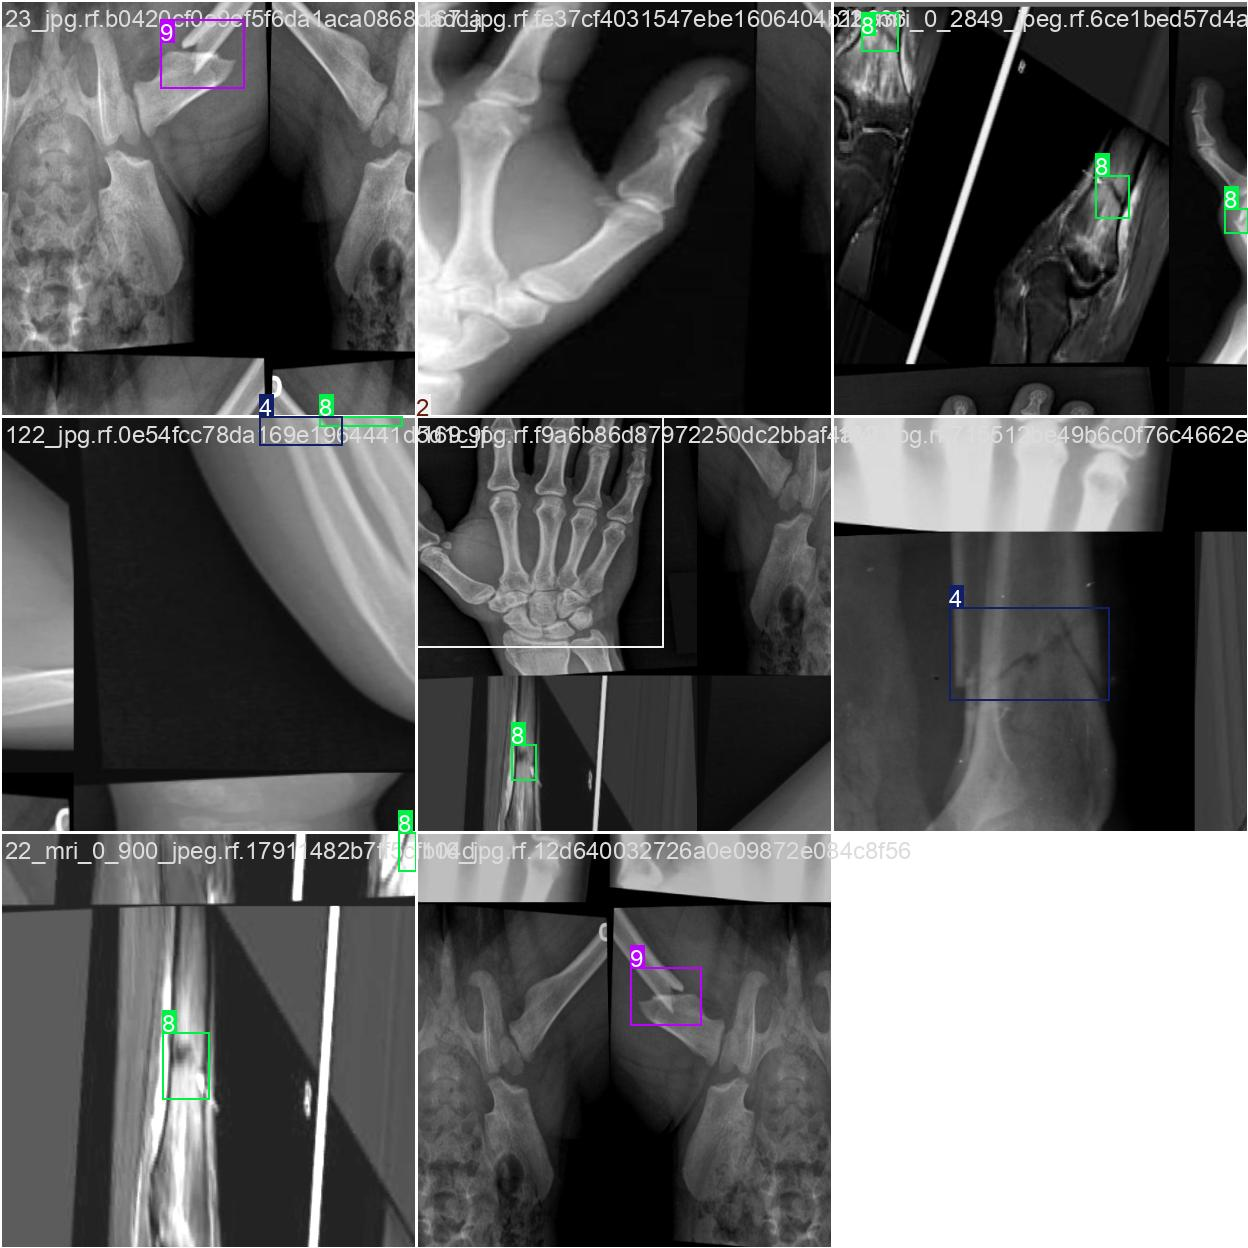

In [34]:
display(Image(filename="/content/runs/detect/train7/train_batch1.jpg", width=700))

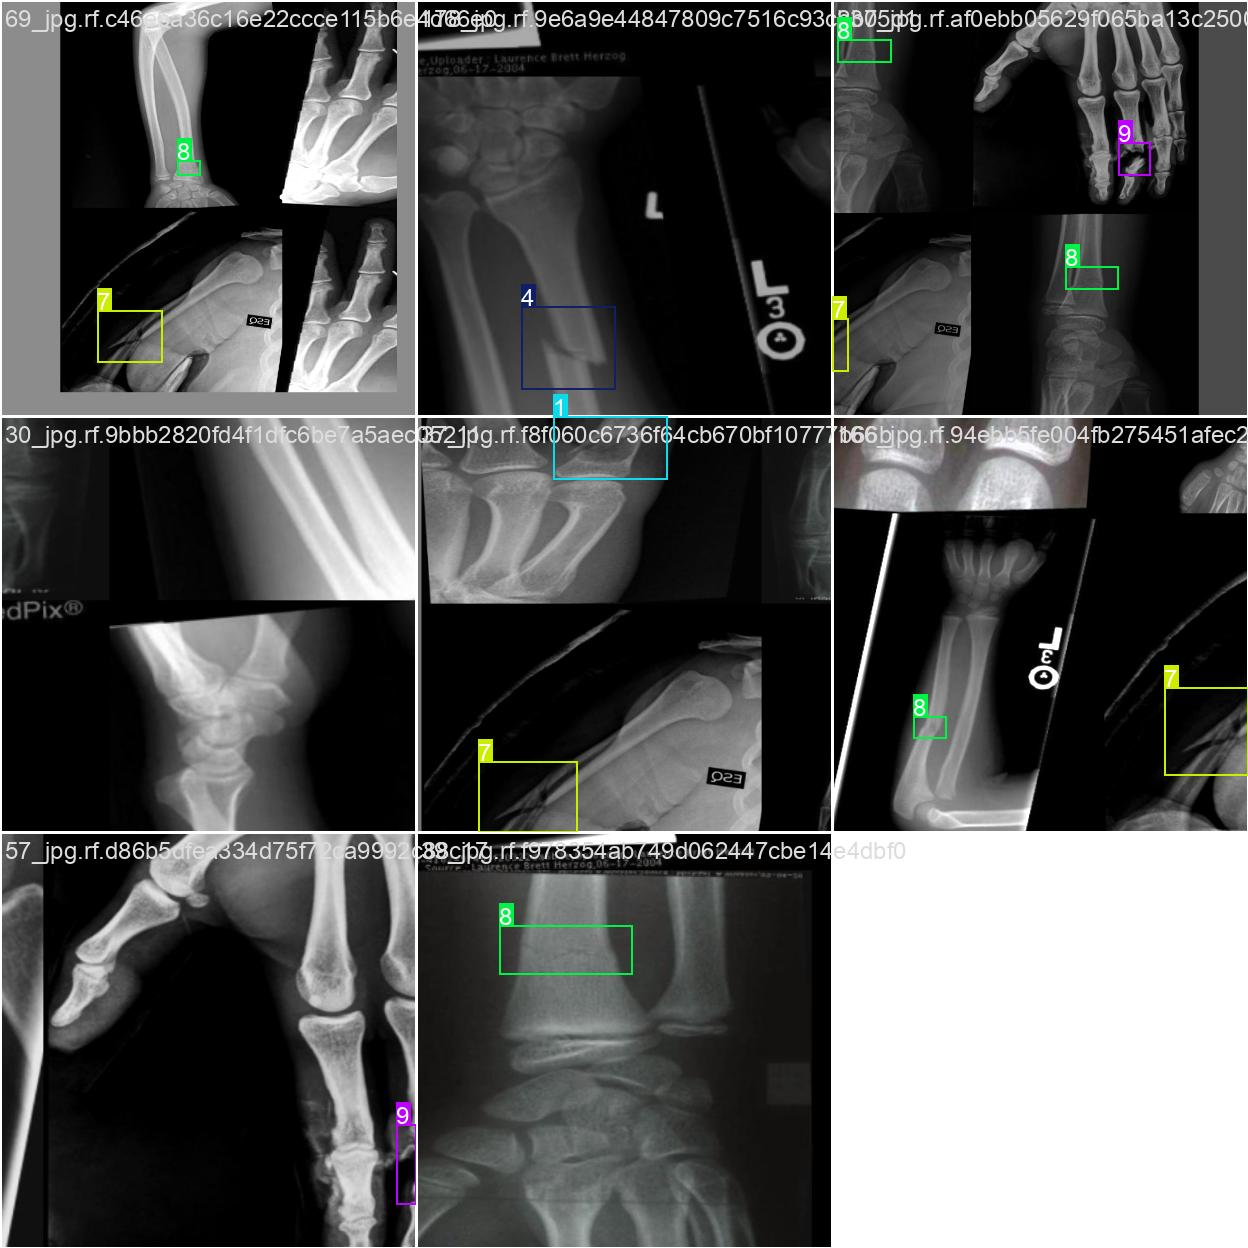

In [35]:
display(Image(filename="/content/runs/detect/train7/train_batch2.jpg", width=700))

### Custom Image Prediction Function

In [41]:
from ultralytics import YOLO
from PIL import Image
import supervision as sv
import numpy as np
import matplotlib.pyplot as plt

# Optional: define your class names (replace with your actual classes if needed)
class_names = ['Comminuted', 'Greenstick', 'Healthy', 'Linear', 'Oblique Displaced',
               'Oblique', 'Segmental', 'Spiral', 'Transverse Displaced', 'Transverse']

def predict_fracture(image_path, model_path="best.pt"):
    # Load image
    image = Image.open(image_path)

    # Load model
    model = YOLO(model_path)

    # Prediction
    results = model(image)[0]
    detections = sv.Detections.from_ultralytics(results)

    # Annotators
    label_annotator = sv.LabelAnnotator()
    box_annotator = sv.BoxAnnotator()

    # Annotate
    annotated = box_annotator.annotate(scene=np.array(image.copy()), detections=detections)
    annotated = label_annotator.annotate(scene=annotated, detections=detections)

    # Show result
    plt.figure(figsize=(8, 8))
    plt.imshow(annotated)
    plt.axis("off")
    plt.title("Prediction Result")
    plt.show()

    # Print class names and confidence
    print("\n🔍 Prediction Details:")
    for class_id, conf in zip(detections.class_id, detections.confidence):
        class_label = class_names[class_id] if class_id < len(class_names) else f"Unknown({class_id})"
        print(f"🦴 Fracture Type: {class_label}, Confidence: {conf:.2f}")



0: 512x640 2 persons, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 2.4ms postprocess per image at shape (1, 3, 512, 640)


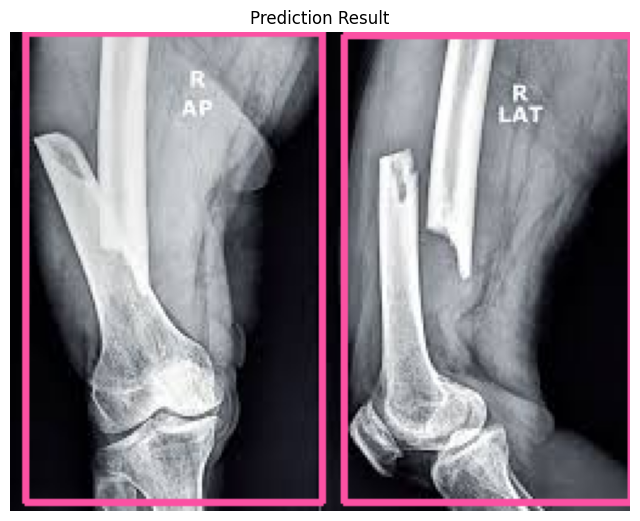


🔍 Prediction Details:
🦴 Fracture Type: Comminuted, Confidence: 0.42
🦴 Fracture Type: Comminuted, Confidence: 0.28


In [42]:
predict_fracture("/content/image1.jpeg", model_path="/content/yolo11n.pt")


0: 448x640 1 person, 60.8ms
Speed: 2.0ms preprocess, 60.8ms inference, 3.1ms postprocess per image at shape (1, 3, 448, 640)


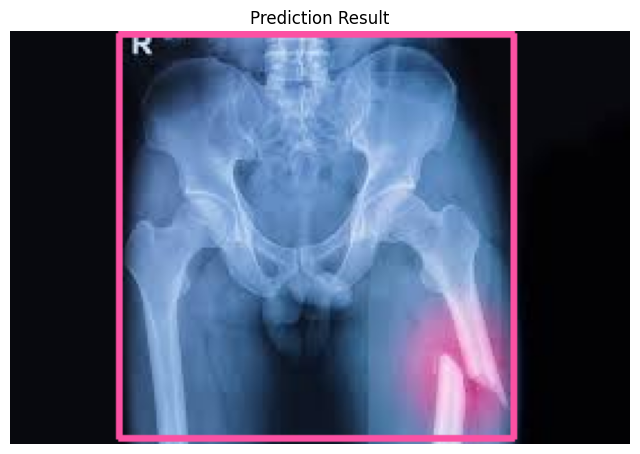


🔍 Prediction Details:
🦴 Fracture Type: Comminuted, Confidence: 0.32


In [43]:
predict_fracture("/content/image2.jpeg", model_path="/content/yolo11n.pt")

In [48]:
from ultralytics import YOLO
from PIL import Image
import supervision as sv
import numpy as np
import matplotlib.pyplot as plt

# Your class names (order matches your training dataset)
class_names = ['Comminuted', 'Greenstick', 'Healthy', 'Linear', 'Oblique Displaced',
               'Oblique', 'Segmental', 'Spiral', 'Transverse Displaced', 'Transverse']

def predict_fracture(image_path, model_path="best.pt", conf_threshold=0.05, iou_threshold=0.5):
    # 1. Load the image
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)

    # 2. Load the YOLO model
    model = YOLO(model_path)

    # 3. Make prediction
    results = model.predict(image, conf=conf_threshold, iou=iou_threshold, verbose=False)[0]

    # 4. Parse detections
    detections = sv.Detections.from_ultralytics(results)

    if len(detections) == 0:
        print("⚠️ No fracture detected.")
        return

    # 5. Create annotators
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    # 6. Annotate image
    annotated = box_annotator.annotate(scene=image_np.copy(), detections=detections)
    annotated = label_annotator.annotate(scene=annotated, detections=detections)

    # 7. Show output
    plt.figure(figsize=(8, 8))
    plt.imshow(annotated)
    plt.axis("off")
    plt.title("🦴 Fracture Detection")
    plt.show()

    # 8. Print class-wise detection
    print("\n🔎 Detection Summary:")
    for class_id, conf in zip(detections.class_id, detections.confidence):
        label = class_names[class_id] if class_id < len(class_names) else f"Unknown({class_id})"
        print(f"🦴 {label}: {conf:.2f}")


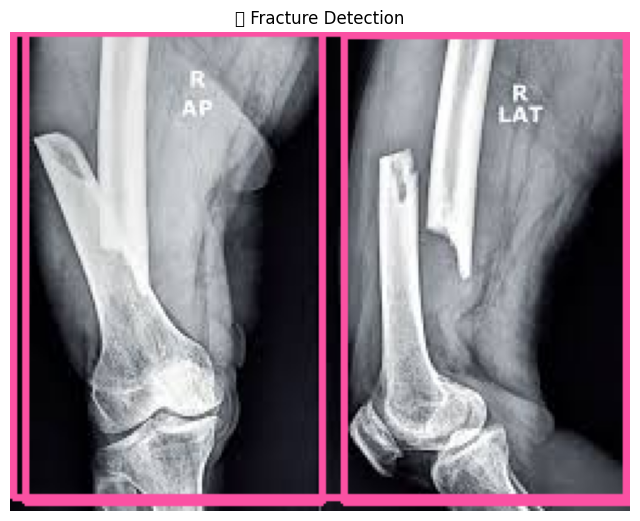


🔎 Detection Summary:
🦴 Comminuted: 0.42
🦴 Comminuted: 0.28
🦴 Comminuted: 0.15


In [49]:
predict_fracture("/content/image1.jpeg", model_path="/content/yolo11n.pt", conf_threshold=0.1)